# This is for turning my gross text thing I exported in netlogo into an actual graph so that I can do something useful 

In [1]:
from igraph import *
import json

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [17]:
# I stole this from http://neuroplausible.com/gini

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [73]:
# the EI index as described in 
# Krackhardt, D., & Stern, R. N. (1988). 
# Informal networks and organizational crises: An experimental simulation.
# Social psychology quarterly, 123-140.

def EI_index(a_graph, first_subgraph, second_subgraph):
    """
    
    = (EL - IL) / (EL + IL)
    
     The possible scores for this index range
     from -1.0 to +1.0. As the E-I index
     approaches +1.0, all the links would be
     external to the subunits. A score of -1.0
     would indicate that all the links are internal.
     If the links are divided equally, the index will
     equal zero
    
    """
    IL = len(first_subgraph.edges) + len(second_subgraph)
    
    # all of the links, minus the internal links I think.
    EL = len(a_graph.edges) - IL
    
    return (EL - IL) / (EL + IL)
    
    
    
    

In [66]:
def construct_graph_from_file(file_name):

    g = nx.Graph()

    with open(file_name, "r") as f:
        lines = f.readlines()

        node_names = []
        node_colors = []
        node_is_adversarial = []

        edges = 0

        for line in lines:
            if line == "\n":
                continue

            node_info = eval(line)[0]

            node_names.append(node_info[0])
            node_colors.append(node_info[1])
            node_is_adversarial.append(node_info[2])

            edges += len(node_info[-1])

            g.add_node(node_info[0], color = node_info[1], is_adversarial=node_info[2] )

            for other_node in node_info[-1]:
                # should check if the edge exists first
                g.add_edge(node_info[0], other_node, color="blue")
                
                
        
        return g

    

In [93]:
def construct_subgraphs(a_graph, field = "is_adversarial"):
    """
    
    Returns coop, adver
    or 
    matching, not matching
    
    """
    
    bad_or_nah = np.array(list(g.nodes.data("is_adversarial")))

    cooperator_nodes = bad_or_nah[np.where(bad_or_nah[:, 1] == 0)][:, 0]
    adversary_nodes = bad_or_nah[np.where(bad_or_nah[:, 1] != 0)][:, 0]

    adversary_graph = g.subgraph(adversary_nodes)
    cooperator_graph = g.subgraph(cooperator_nodes)
    
    
    if field == "is_adversarial":
        return cooperator_graph, adversary_graph
    
    elif field == "color":
        # this should probably be only the cooperator nodes

        g_colors = np.array(list(cooperator_graph.nodes.data("color")))
        
        most_popular_color = stats.mode(g_colors[:,1])[0]
        
        matching_nodes = g_colors[np.where(g_colors[:, 1] == 0)][:, 0]
        other_nodes = g_colors[np.where(g_colors[:, 1] != 0)][:, 0]

        subgraph1 = g.subgraph(matching_nodes)
        subgraph2 = g.subgraph(other_nodes)
    
    
    
    
    return subgraph1, subgraph2
    

In [94]:
g = construct_graph_from_file("./networks/Barabasi1/rep_dis_12017_final.txt")

In [95]:
most_popular_color_graph, other_colors_graph = construct_subgraphs(g, field="color") 

In [97]:
most_popular_color_graph

In [96]:
pos = nx.drawing.layout.kamada_kawai_layout(most_popular_color_graph)

nx.draw(most_popular_color_graph, pos=pos, with_labels=True, font_size=3,
        node_color='yellowgreen', node_size=10)

plt.show()

error: failed in converting 3rd argument `l' of _lbfgsb.setulb to C/Fortran array

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [89]:
adver_graph, coop_graph = construct_subgraphs(g, field="is_adversarial")

C:\Users\Matt\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


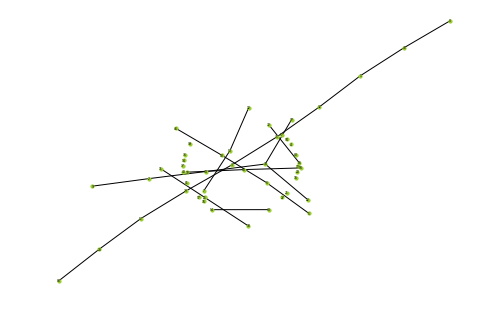

In [70]:
pos = nx.drawing.layout.kamada_kawai_layout(cooperator_graph)

nx.draw(cooperator_graph, pos=pos, with_labels=True, font_size=3,
        node_color='yellowgreen', node_size=10)

plt.show()

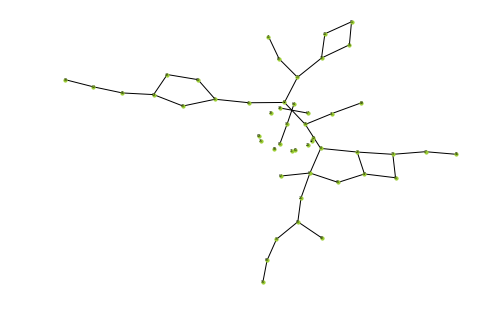

In [71]:
pos = nx.drawing.layout.kamada_kawai_layout(adversary_graph)

nx.draw(adversary_graph, pos=pos, with_labels=True, font_size=3,
        node_color='yellowgreen', node_size=10)

plt.show()

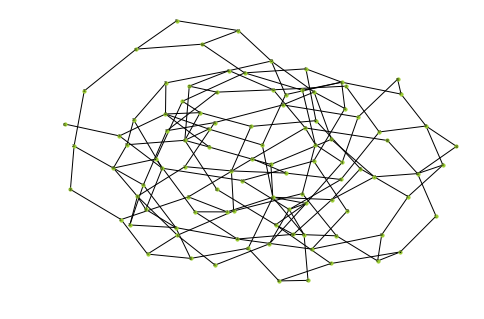

In [72]:
pos = nx.drawing.layout.kamada_kawai_layout(g)

nx.draw(g, pos=pos, with_labels=True, font_size=3,
        node_color='yellowgreen', node_size=10)

plt.show()

In [74]:
EI_index(g, cooperator_graph, adversary_graph)

0.07975460122699386

(array([12., 22., 36., 14., 12.,  3.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.01282865, 0.0256573 , 0.03848595, 0.05131459,
        0.06414324, 0.07697189, 0.08980054, 0.10262919, 0.11545784,
        0.12828648]),
 <a list of 10 Patch objects>)

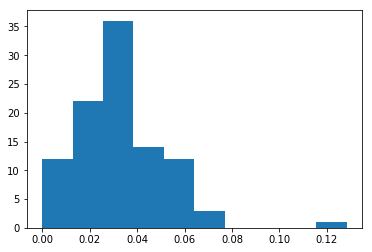

In [56]:
plt.hist(nx.algorithms.centrality.betweenness_centrality(g).values())

(array([ 1., 12.,  0., 60.,  0., 17.,  8.,  0.,  1.,  1.]),
 array([0.01010101, 0.01616162, 0.02222222, 0.02828283, 0.03434343,
        0.04040404, 0.04646465, 0.05252525, 0.05858586, 0.06464646,
        0.07070707]),
 <a list of 10 Patch objects>)

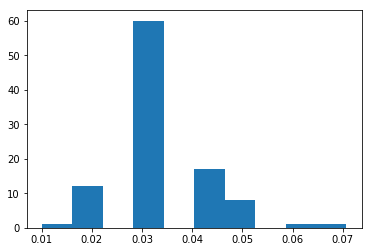

In [57]:
plt.hist(nx.algorithms.centrality.degree_centrality(g).values())

In [58]:
gini(np.array(list(nx.algorithms.centrality.degree_centrality(g).values())))

0.13484621626455803